In [1]:
library (RColorBrewer)
library (tidyverse)
library (openxlsx)
library (magrittr)  
library (ggrepel)
library (cowplot)
library (readr)
library (ggpubr)
library (eulerr)
library (ComplexHeatmap)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/Comple

In [2]:
dt = read.table("./data/f_CA2021_inlog_FC15_FC2_evidence-threshold_v4.tsv", sep = '\t', row.names =1, header = T)

In [3]:
d = dt

In [4]:
Target_CA2021 = d %>%
filter (., howmany_CA > 0)
Target_CA2021= rownames(Target_CA2021) 
length (Target_CA2021)

[1] 553

In [5]:
Target_time = d %>%
filter (., howmany_time > 0)
Target_time= rownames(Target_time) 
length (Target_time)

[1] 662

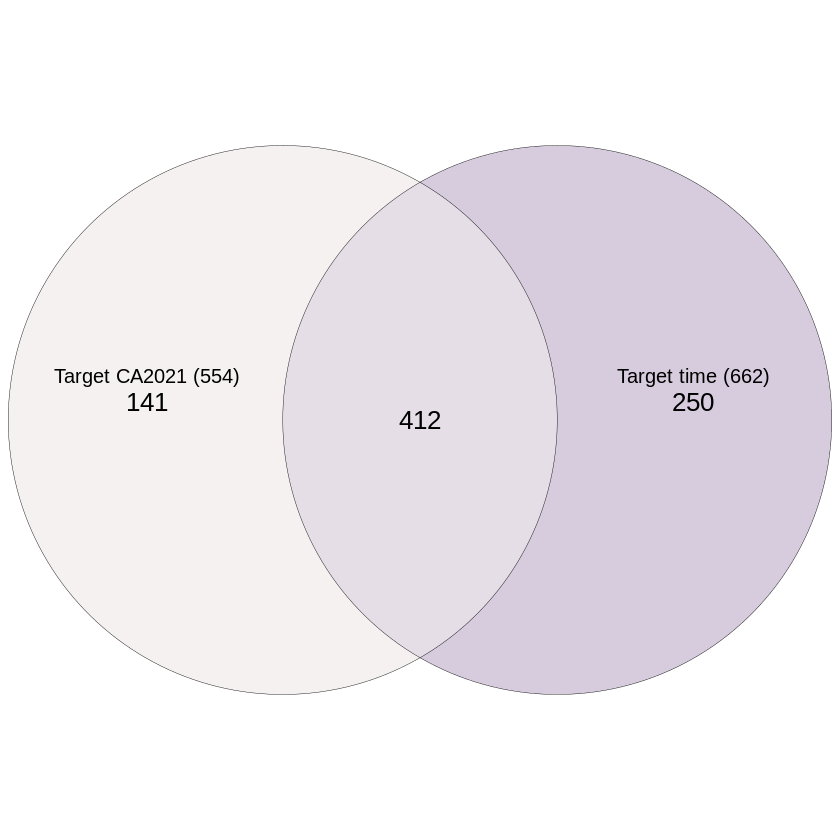

In [6]:
Venn = plot(venn(list(        
  "Target CA2021 (554)" = Target_CA2021,
  "Target time (662)" = Target_time
)),

fills = list(fill = c( 

  "#F1ECEB",
  "#C9BCD3"
),
alpha = 0.77),
labels = list(font = 1, col = "black", cex = 1),
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [7]:
#pdf(file = "Venn CA2021 x time.pdf", width = 6, height = 4) # defaults to 7 x 7 inches
#Venn
#dev.off()

### QC: What are common ("reference") targets at 24 h at high concentrations

> add column in excel

In [8]:
d = dt %>%
filter (., howmany_CA> 0)
dim (d)

[1] 553 149

In [9]:
dc = d %>%
mutate (common_24h_wo1nM = rowSums (select(., c(Target_V125D3_10nM_24h,
                                            
                                                Target_V25D3_500nM_24h,
                                                Target_V25D3_750nM_24h,
                                                Target_V25D3_1000nM_24h,
                                                
                                                Target_V25D2_500nM_24h,
                                                Target_V25D2_750nM_24h,
                                                Target_V25D2_1000nM_24h)))) 

In [10]:
head (dc)

EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1 EtOH_x_08h_R2
AATK  6.955973      7.134490      6.980104      7.048117      7.005532     
ABCA6 2.484917      2.350197      2.816975      3.208966      3.059414     
ABCB4 2.923408      3.515231      2.602277      3.085061      2.891443     
ABCC3 3.862506      3.447034      3.793640      5.172834      5.322335     
ACP3  2.038002      1.445395      1.120945      2.104430      2.263743     
ACP5  3.862506      3.992855      4.324714      4.169809      4.016998     
      EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3
AATK  7.165293      5.834342      5.615455      5.801333     
ABCA6 3.160508      2.780370      3.118319      2.992483     
ABCB4 3.296257      3.022361      2.925868      3.077472     
ABCC3 5.722435      6.765243      6.612140      7.193706     
ACP3  1.763944      4.289574      4.153249      3.847722     
ACP5  4.296732      5.869168      5.823150      5.809638     
      V125D3_0.1nM_24h_R1 ⋯ ensembl_gene_id entrezgene_id external_gene_name
AATK  6.391017            ⋯ ENSG00000181409  9625         AATK              
ABCA6 2.511257            ⋯ ENSG00000154262 23460         ABCA6             
ABCB4 3.129089            ⋯ ENSG00000005471  5244         ABCB4             
ABCC3 6.293958            ⋯ ENSG00000108846  8714         ABCC3             
ACP3  3.679465            ⋯ ENSG00000014257    55         ACP3              
ACP5  5.549809            ⋯ ENSG00000102575    54         ACP5              
      description                               chromosome_name start_position
AATK  apoptosis associated tyrosine kinase      17               81110487     
ABCA6 ATP binding cassette subfamily A member 6 17               69078702     
ABCB4 ATP binding cassette subfamily B member 4 7                87401696     
ABCC3 ATP binding cassette subfamily C member 3 17               50634777     
ACP3  acid phosphatase 3                        3               132317369     
ACP5  acid phosphatase 5, tartrate resistant    19               11574660     
      end_position gene_biotype   strand common_24h_wo1nM
AATK   81166221    protein coding -1     6               
ABCA6  69141895    protein coding -1     4               
ABCB4  87480435    protein coding -1     1               
ABCC3  50692253    protein coding  1     7               
ACP3  132368298    protein coding  1     1               
ACP5   11579008    protein coding -1     5

In [11]:
#write.xlsx (dc, "QC2_extracols.xlsx", rowNames = T)

In [12]:
ref_206 = dc %>%
filter (., common_24h_wo1nM == 7) %>%
filter (., howmany_time >0) %>%
rownames()

In [13]:
length (ref_206)
head (ref_206)

[1] 206

[1] "ABCC3"    "ACTB"     "ACVRL1"   "ADAMTSL4" "ADGRE1"   "ADGRE3"

In [16]:
load("./data/workspace_largetable.RData")

In [17]:
head (mrg_light)
dim (mrg_light)

hgnc_symbol EtOH_04h.Avg EtOH_08h.Avg EtOH_24h.Avg V125D3_10nM_04h.Avg
1 AATK        129.426485   133.914910    53.074204   77.176868          
2 ABCA6         5.038895     7.965856     6.961789    4.536765          
3 ABCB4         7.488497     7.700842     7.179503    9.125261          
4 ABCC3        12.230635    42.085302   116.790128    8.784478          
5 ACP3          2.125970     3.290591    16.373274    3.988684          
6 ACP5         15.959376    17.071629    56.176604   13.126758          
  V125D3_10nM_08h.Avg V25D3_1000nM_04h.Avg V25D3_1000nM_08h.Avg
1 44.661316           98.652910            59.391193           
2  4.424182            3.190337             3.555957           
3 11.506705           13.145272            13.071549           
4 22.003349            7.622683            17.727552           
5  2.329825            3.020221             2.283040           
6 19.522354           15.128474            19.975501           
  V25D2_1000nM_04h.Avg V25D2_1000nM_08h.Avg ⋯ general_category  
1 98.645701            72.695157            ⋯ Enzyme/Transporter
2  2.849792             3.529851            ⋯ 0                 
3 13.847856            13.858732            ⋯ Enzyme/Transporter
4  8.153667            13.385738            ⋯ Enzyme/Transporter
5  1.751392             1.578878            ⋯ Enzyme/Transporter
6 15.186702            21.404727            ⋯ 0                 
  ensembl_gene_id entrezgene_id external_gene_name
1 ENSG00000181409  9625         AATK              
2 ENSG00000154262 23460         ABCA6             
3 ENSG00000005471  5244         ABCB4             
4 ENSG00000108846  8714         ABCC3             
5 ENSG00000014257    55         ACP3              
6 ENSG00000102575    54         ACP5              
  description                               chromosome_name start_position
1 apoptosis associated tyrosine kinase      17               81110487     
2 ATP binding cassette subfamily A member 6 17               69078702     
3 ATP binding cassette subfamily B member 4 7                87401696     
4 ATP binding cassette subfamily C member 3 17               50634777     
5 acid phosphatase 3                        3               132317369     
6 acid phosphatase 5, tartrate resistant    19               11574660     
  end_position gene_biotype   strand
1  81166221    protein coding -1    
2  69141895    protein coding -1    
3  87480435    protein coding -1    
4  50692253    protein coding  1    
5 132368298    protein coding  1    
6  11579008    protein coding -1

[1] 553 102

In [18]:
tableS2 <- mrg_light %>%
mutate (., ref_206 = ifelse(hgnc_symbol %in% ref_206, "yes", "no"))

head(tableS2)

hgnc_symbol EtOH_04h.Avg EtOH_08h.Avg EtOH_24h.Avg V125D3_10nM_04h.Avg
1 AATK        129.426485   133.914910    53.074204   77.176868          
2 ABCA6         5.038895     7.965856     6.961789    4.536765          
3 ABCB4         7.488497     7.700842     7.179503    9.125261          
4 ABCC3        12.230635    42.085302   116.790128    8.784478          
5 ACP3          2.125970     3.290591    16.373274    3.988684          
6 ACP5         15.959376    17.071629    56.176604   13.126758          
  V125D3_10nM_08h.Avg V25D3_1000nM_04h.Avg V25D3_1000nM_08h.Avg
1 44.661316           98.652910            59.391193           
2  4.424182            3.190337             3.555957           
3 11.506705           13.145272            13.071549           
4 22.003349            7.622683            17.727552           
5  2.329825            3.020221             2.283040           
6 19.522354           15.128474            19.975501           
  V25D2_1000nM_04h.Avg V25D2_1000nM_08h.Avg ⋯ ensembl_gene_id entrezgene_id
1 98.645701            72.695157            ⋯ ENSG00000181409  9625        
2  2.849792             3.529851            ⋯ ENSG00000154262 23460        
3 13.847856            13.858732            ⋯ ENSG00000005471  5244        
4  8.153667            13.385738            ⋯ ENSG00000108846  8714        
5  1.751392             1.578878            ⋯ ENSG00000014257    55        
6 15.186702            21.404727            ⋯ ENSG00000102575    54        
  external_gene_name description                               chromosome_name
1 AATK               apoptosis associated tyrosine kinase      17             
2 ABCA6              ATP binding cassette subfamily A member 6 17             
3 ABCB4              ATP binding cassette subfamily B member 4 7              
4 ABCC3              ATP binding cassette subfamily C member 3 17             
5 ACP3               acid phosphatase 3                        3              
6 ACP5               acid phosphatase 5, tartrate resistant    19             
  start_position end_position gene_biotype   strand ref_206
1  81110487       81166221    protein coding -1     no     
2  69078702       69141895    protein coding -1     no     
3  87401696       87480435    protein coding -1     no     
4  50634777       50692253    protein coding  1     yes    
5 132317369      132368298    protein coding  1     no     
6  11574660       11579008    protein coding -1     no

In [19]:
str (tableS2)

'data.frame':	553 obs. of  103 variables:
 $ hgnc_symbol            : chr  "AATK" "ABCA6" "ABCB4" "ABCC3" ...
 $ EtOH_04h.Avg           : num  129.43 5.04 7.49 12.23 2.13 ...
 $ EtOH_08h.Avg           : num  133.91 7.97 7.7 42.09 3.29 ...
 $ EtOH_24h.Avg           : num  53.07 6.96 7.18 116.79 16.37 ...
 $ V125D3_10nM_04h.Avg    : num  77.18 4.54 9.13 8.78 3.99 ...
 $ V125D3_10nM_08h.Avg    : num  44.66 4.42 11.51 22 2.33 ...
 $ V25D3_1000nM_04h.Avg   : num  98.65 3.19 13.15 7.62 3.02 ...
 $ V25D3_1000nM_08h.Avg   : num  59.39 3.56 13.07 17.73 2.28 ...
 $ V25D2_1000nM_04h.Avg   : num  98.65 2.85 13.85 8.15 1.75 ...
 $ V25D2_1000nM_08h.Avg   : num  72.7 3.53 13.86 13.39 1.58 ...
 $ V125D3_0.1nM_24h.Avg   : num  79.5 5.21 8.03 86.63 11.75 ...
 $ V125D3_1nM_24h.Avg     : num  47.62 2.61 11.16 84.13 9.05 ...
 $ V125D3_10nM_24h.Avg    : num  14.46 2.68 15.33 45.84 6.76 ...
 $ V25D3_100nM_24h.Avg    : num  83.49 5.63 6.63 85.84 15.49 ...
 $ V25D3_250nM_24h.Avg    : num  66.45 7.81 8.24 91.25

In [20]:
tableS2 = tableS2 %>%
  mutate(across(c(Target_V125D3_1nM_24h:Target_V25D2_750nM_24h), ~ gsub("0", "no", .)))%>%
  mutate(across(c(Target_V125D3_1nM_24h:Target_V25D2_750nM_24h), ~ gsub("1", "yes", .))) %>%
  mutate(across(c(primary), ~ gsub("1", "primary", .)))%>%
  mutate(across(c(primary), ~ gsub("0", "secondary", .)))%>%

  mutate(across(c(cluster), ~ gsub("1", "direct up", .)))%>%
  mutate(across(c(cluster), ~ gsub("2", "direct down", .)))%>%
  mutate(across(c(cluster), ~ gsub("3", "indirect down", .)))%>%
  mutate(across(c(cluster), ~ gsub("4", "indirect up", .)))

In [21]:
str(tableS2)

'data.frame':	553 obs. of  103 variables:
 $ hgnc_symbol            : chr  "AATK" "ABCA6" "ABCB4" "ABCC3" ...
 $ EtOH_04h.Avg           : num  129.43 5.04 7.49 12.23 2.13 ...
 $ EtOH_08h.Avg           : num  133.91 7.97 7.7 42.09 3.29 ...
 $ EtOH_24h.Avg           : num  53.07 6.96 7.18 116.79 16.37 ...
 $ V125D3_10nM_04h.Avg    : num  77.18 4.54 9.13 8.78 3.99 ...
 $ V125D3_10nM_08h.Avg    : num  44.66 4.42 11.51 22 2.33 ...
 $ V25D3_1000nM_04h.Avg   : num  98.65 3.19 13.15 7.62 3.02 ...
 $ V25D3_1000nM_08h.Avg   : num  59.39 3.56 13.07 17.73 2.28 ...
 $ V25D2_1000nM_04h.Avg   : num  98.65 2.85 13.85 8.15 1.75 ...
 $ V25D2_1000nM_08h.Avg   : num  72.7 3.53 13.86 13.39 1.58 ...
 $ V125D3_0.1nM_24h.Avg   : num  79.5 5.21 8.03 86.63 11.75 ...
 $ V125D3_1nM_24h.Avg     : num  47.62 2.61 11.16 84.13 9.05 ...
 $ V125D3_10nM_24h.Avg    : num  14.46 2.68 15.33 45.84 6.76 ...
 $ V25D3_100nM_24h.Avg    : num  83.49 5.63 6.63 85.84 15.49 ...
 $ V25D3_250nM_24h.Avg    : num  66.45 7.81 8.24 91.25

In [22]:
save.image(file = "data/TableS2.RData")

In [23]:
head (mrg2)
dim (mrg2)

hgnc_symbol EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1
1 A1BG        1.8518707     2.1067113     1.6550227     2.104430     
2 A2M         0.6971855     0.1886069     0.2636435     1.012378     
3 A4GALT      1.2430393     1.7010063     1.3217491     2.039147     
4 AAAS        4.7927674     5.0477924     4.8805749     5.180423     
5 AACS        4.3582961     4.4931192     4.6386878     4.731182     
6 AAGAB       5.3537138     5.3387265     5.0598437     5.282679     
  EtOH_x_08h_R2 EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3 ⋯
1 1.857728      2.402356      2.626028      2.1899331     1.976054      ⋯
2 0.613675      1.177605      1.426546      0.9709726     2.194730      ⋯
3 1.804663      1.763944      1.349713      2.1899331     1.489214      ⋯
4 5.199244      5.221009      5.303485      5.2216163     5.200543      ⋯
5 4.523300      4.906312      4.560674      4.5504258     4.760963      ⋯
6 5.293737      5.206309      5.071966      5.3651773     5.200543      ⋯
  general_category ensembl_gene_id entrezgene_id external_gene_name
1 0                ENSG00000121410     1         A1BG              
2 0                ENSG00000175899     2         A2M               
3 0                ENSG00000128274 53947         A4GALT            
4 0                ENSG00000094914  8086         AAAS              
5 0                ENSG00000081760 65985         AACS              
6 0                ENSG00000103591 79719         AAGAB             
  description                                     chromosome_name
1 alpha-1-B glycoprotein                          19             
2 alpha-2-macroglobulin                           12             
3 alpha 1,4-galactosyltransferase (P blood group) 22             
4 aladin WD repeat nucleoporin                    12             
5 acetoacetyl-CoA synthetase                      12             
6 alpha and gamma adaptin binding protein         15             
  start_position end_position gene_biotype   strand
1  58345178       58353492    protein coding -1    
2   9067664        9116229    protein coding -1    
3  42692121       42721298    protein coding -1    
4  53307456       53324864    protein coding -1    
5 125065434      125143333    protein coding  1    
6  67200667       67255195    protein coding -1

[1] 12940   150

In [24]:
mrg2 <- mrg2 %>%
mutate (., ref_206 = ifelse(hgnc_symbol %in% ref_206, "yes", "no"))

head(mrg2)

hgnc_symbol EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1
1 A1BG        1.8518707     2.1067113     1.6550227     2.104430     
2 A2M         0.6971855     0.1886069     0.2636435     1.012378     
3 A4GALT      1.2430393     1.7010063     1.3217491     2.039147     
4 AAAS        4.7927674     5.0477924     4.8805749     5.180423     
5 AACS        4.3582961     4.4931192     4.6386878     4.731182     
6 AAGAB       5.3537138     5.3387265     5.0598437     5.282679     
  EtOH_x_08h_R2 EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3 ⋯
1 1.857728      2.402356      2.626028      2.1899331     1.976054      ⋯
2 0.613675      1.177605      1.426546      0.9709726     2.194730      ⋯
3 1.804663      1.763944      1.349713      2.1899331     1.489214      ⋯
4 5.199244      5.221009      5.303485      5.2216163     5.200543      ⋯
5 4.523300      4.906312      4.560674      4.5504258     4.760963      ⋯
6 5.293737      5.206309      5.071966      5.3651773     5.200543      ⋯
  ensembl_gene_id entrezgene_id external_gene_name
1 ENSG00000121410     1         A1BG              
2 ENSG00000175899     2         A2M               
3 ENSG00000128274 53947         A4GALT            
4 ENSG00000094914  8086         AAAS              
5 ENSG00000081760 65985         AACS              
6 ENSG00000103591 79719         AAGAB             
  description                                     chromosome_name
1 alpha-1-B glycoprotein                          19             
2 alpha-2-macroglobulin                           12             
3 alpha 1,4-galactosyltransferase (P blood group) 22             
4 aladin WD repeat nucleoporin                    12             
5 acetoacetyl-CoA synthetase                      12             
6 alpha and gamma adaptin binding protein         15             
  start_position end_position gene_biotype   strand ref_206
1  58345178       58353492    protein coding -1     no     
2   9067664        9116229    protein coding -1     no     
3  42692121       42721298    protein coding -1     no     
4  53307456       53324864    protein coding -1     no     
5 125065434      125143333    protein coding  1     no     
6  67200667       67255195    protein coding -1     no

In [25]:
write.table(mrg2, "./data/f_CA2021_inlog_FC15_FC2_evidence-threshold_final.tsv", sep = '\t', row.names =F)

In [26]:
Target_V125D3_1nM_24h = d %>%
filter (., Target_V125D3_1nM_24h == 1)
Target_V125D3_1nM_24h = rownames(Target_V125D3_1nM_24h) 
length (Target_V125D3_1nM_24h)

Target_V125D3_10nM_04h = d %>%
filter (., Target_V125D3_10nM_04h == 1)
Target_V125D3_10nM_04h = rownames(Target_V125D3_10nM_04h) 
length (Target_V125D3_10nM_04h)

Target_V125D3_10nM_08h = d %>%
filter (., Target_V125D3_10nM_08h == 1)
Target_V125D3_10nM_08h = rownames(Target_V125D3_10nM_08h) 
length (Target_V125D3_10nM_08h)

Target_V125D3_10nM_24h = d %>%
filter (., Target_V125D3_10nM_24h == 1)
Target_V125D3_10nM_24h = rownames(Target_V125D3_10nM_24h) 
length (Target_V125D3_10nM_24h)


Target_V125D3_0.1nM_24h= d %>%
filter (., Target_V125D3_0.1nM_24h==1)
Target_V125D3_0.1nM_24h = rownames (Target_V125D3_0.1nM_24h)
length (Target_V125D3_0.1nM_24h)


Target_V25D3_1000nM_04h = d %>%
filter (., Target_V25D3_1000nM_04h ==1)
Target_V25D3_1000nM_04h = rownames (Target_V25D3_1000nM_04h)
length (Target_V25D3_1000nM_04h)

Target_V25D3_1000nM_08h = d %>%
filter (., Target_V25D3_1000nM_08h ==1)
Target_V25D3_1000nM_08h = rownames (Target_V25D3_1000nM_08h)
length (Target_V25D3_1000nM_08h)

Target_V25D3_1000nM_24h = d %>%
filter (., Target_V25D3_1000nM_24h ==1)
Target_V25D3_1000nM_24h = rownames (Target_V25D3_1000nM_24h)
length (Target_V25D3_1000nM_24h)


Target_V25D2_1000nM_04h = d %>%
filter (., Target_V25D2_1000nM_04h ==1)
Target_V25D2_1000nM_04h = rownames (Target_V25D2_1000nM_04h)
length (Target_V25D2_1000nM_04h)

Target_V25D2_1000nM_08h = d %>%
filter (., Target_V25D2_1000nM_08h ==1)
Target_V25D2_1000nM_08h = rownames (Target_V25D2_1000nM_08h)
length (Target_V25D2_1000nM_08h)

Target_V25D2_1000nM_24h = d %>%
filter (., Target_V25D2_1000nM_24h ==1)
Target_V25D2_1000nM_24h = rownames (Target_V25D2_1000nM_24h)
length (Target_V25D2_1000nM_24h)


Target_V25D3_100nM_24h = d %>%
filter (., Target_V25D3_100nM_24h ==1)
Target_V25D3_100nM_24h = rownames (Target_V25D3_100nM_24h)
length (Target_V25D3_100nM_24h)

Target_V25D3_250nM_24h = d %>%
filter (., Target_V25D3_250nM_24h ==1)
Target_V25D3_250nM_24h = rownames (Target_V25D3_250nM_24h)
length (Target_V25D3_250nM_24h)

Target_V25D3_500nM_24h = d %>%
filter (., Target_V25D3_500nM_24h ==1)
Target_V25D3_500nM_24h = rownames (Target_V25D3_500nM_24h)
length (Target_V25D3_500nM_24h)

Target_V25D3_750nM_24h = d %>%
filter (., Target_V25D3_750nM_24h ==1)
Target_V25D3_750nM_24h = rownames (Target_V25D3_750nM_24h)
length (Target_V25D3_750nM_24h)


Target_V25D2_100nM_24h = d %>%
filter (., Target_V25D2_100nM_24h ==1)
Target_V25D2_100nM_24h = rownames (Target_V25D2_100nM_24h)
length (Target_V25D2_100nM_24h)

Target_V25D2_250nM_24h = d %>%
filter (., Target_V25D2_250nM_24h ==1)
Target_V25D2_250nM_24h = rownames (Target_V25D2_250nM_24h)
length (Target_V25D2_250nM_24h)

Target_V25D2_500nM_24h = d %>%
filter (., Target_V25D2_500nM_24h ==1)
Target_V25D2_500nM_24h = rownames (Target_V25D2_500nM_24h)
length (Target_V25D2_500nM_24h)

Target_V25D2_750nM_24h = d %>%
filter (., Target_V25D2_750nM_24h ==1)
Target_V25D2_750nM_24h = rownames (Target_V25D2_750nM_24h)
length (Target_V25D2_750nM_24h)

[1] 150

[1] 16

[1] 134

[1] 254

[1] 6

[1] 31

[1] 130

[1] 293

[1] 20

[1] 117

[1] 299

[1] 0

[1] 0

[1] 263

[1] 294

[1] 0

[1] 25

[1] 278

[1] 307

## 3x 25D3

In [27]:
length (Target_V25D3_500nM_24h)
length (Target_V25D3_750nM_24h)
length (Target_V25D3_1000nM_24h)

[1] 263

[1] 294

[1] 293

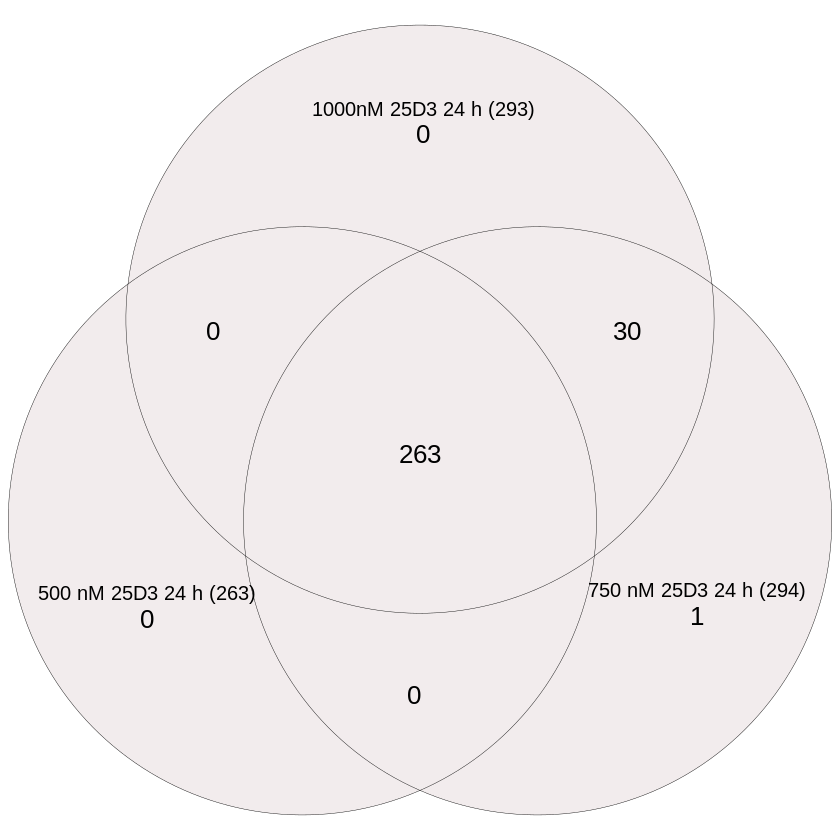

In [28]:
Venn = plot(venn(list(
  "500 nM 25D3 24 h (263)" = Target_V25D3_500nM_24h,
  "750 nM 25D3 24 h (294)" = Target_V25D3_750nM_24h,
 "1000nM 25D3 24 h (293)"  = Target_V25D3_1000nM_24h
)),

fills = list(fill = c( 

   "#ECE5E6", 
  "#ECE5E6" ,
  "#ECE5E6",
    "#ECE5E6" 
),
alpha = 0.72),
labels = list(font = 1, col = "black", cex = 1),
edges = list(lty = 1, lwd =0.33), #0.15
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [29]:
#pdf(file = "Venn 25D3 concentrations (3x).pdf", width = 8, height = 6) # defaults to 7 x 7 inches
#Venn
#dev.off()

## 3x 25D2

In [30]:
length (Target_V25D2_500nM_24h)
length (Target_V25D2_750nM_24h)
length (Target_V25D2_1000nM_24h)

[1] 278

[1] 307

[1] 299

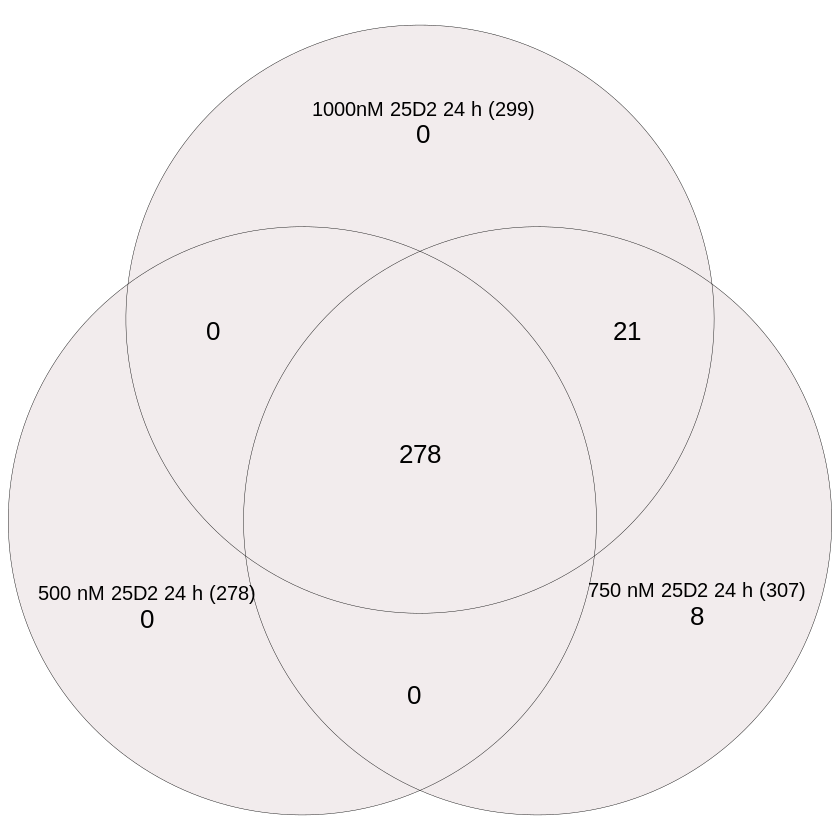

In [31]:
Venn = plot(venn(list(           
  "500 nM 25D2 24 h (278)" = Target_V25D2_500nM_24h,
  "750 nM 25D2 24 h (307)" = Target_V25D2_750nM_24h,
 "1000nM 25D2 24 h (299)"  = Target_V25D2_1000nM_24h
)),

fills = list(fill = c( 

   "#ECE5E6",
  "#ECE5E6" ,
  "#ECE5E6",
    "#ECE5E6" 
),
alpha = 0.72),
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [32]:
#pdf(file = "Venn 25D2 concentrations (3x).pdf", width = 8, height = 6) # defaults to 7 x 7 inches
#Venn
#dev.off()

In [33]:
V25D3 = list(
  "500 nM 25D3 24 h (263)" = Target_V25D3_500nM_24h,
  "750 nM 25D3 24 h (294)" = Target_V25D3_750nM_24h,
 "1000nM 25D3 24 h (293)"  = Target_V25D3_1000nM_24h)

In [34]:
m = make_comb_mat(V25D3)
comb_size(m)
V25D3 = extract_comb(m, "111")
length (V25D3)

111 011 010 
263  30   1

[1] 263

In [35]:
V25D2 = list(
  "500 nM 25D2 24 h (278)" = Target_V25D2_500nM_24h,
  "750 nM 25D2 24 h (307)" = Target_V25D2_750nM_24h,
 "1000nM 25D2 24 h (299)"  = Target_V25D2_1000nM_24h)

In [36]:
m = make_comb_mat(V25D2)
comb_size(m)
V25D2 = extract_comb(m, "111")
length (V25D2)

111 011 010 
278  21   8

[1] 278

In [37]:
length (Target_V125D3_10nM_24h)

[1] 254

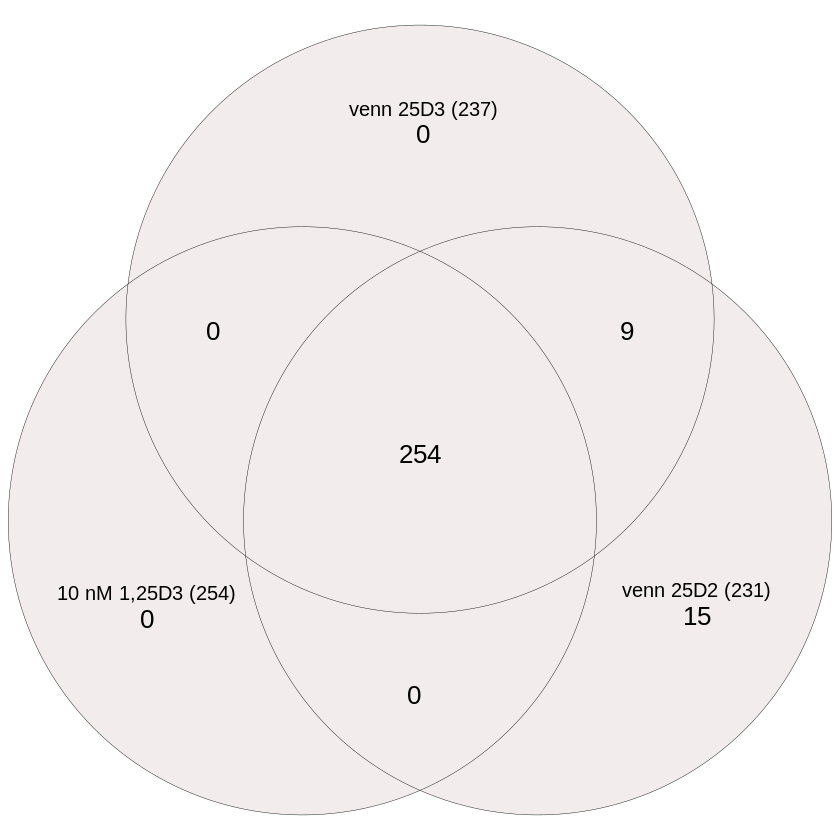

In [38]:
Venn = plot(venn(list(          
  "10 nM 1,25D3 (254)" = Target_V125D3_10nM_24h,
  "venn 25D2 (231)" = V25D2,
 "venn 25D3 (237)"  = V25D3
)),

fills = list(fill = c( 

   "#ECE5E6", 
  "#ECE5E6" ,
  "#ECE5E6"
),
alpha = 0.72),
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), #0.15
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [39]:
#pdf(file = "Venn 125D and 25Ds conc.pdf v2", width = 8, height = 6) # defaults to 7 x 7 inches
#Venn
#dev.off()

In [40]:
length (Target_V125D3_1nM_24h)

[1] 150

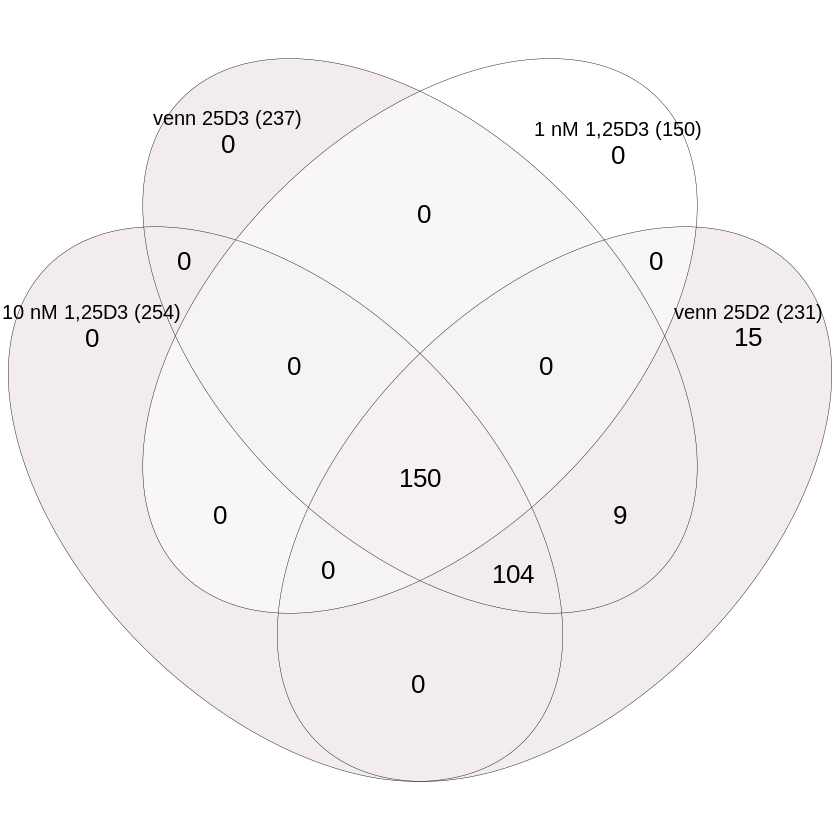

In [41]:
Venn = plot(venn(list(
  "10 nM 1,25D3 (254)" = Target_V125D3_10nM_24h,
  "venn 25D2 (231)" = V25D2,
 "venn 25D3 (237)"  = V25D3,
  "1 nM 1,25D3 (150)" = Target_V125D3_1nM_24h
    
)),

fills = list(fill = c( 

   "#ECE5E6", 
  "#ECE5E6" ,
  "#ECE5E6"
),
alpha = 0.72),
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [42]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/Mamba-14/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ComplexHeatmap_2.10.0 eulerr_6.1.1          ggpubr_0.4.0         
 [4] cowplot_1.1.1         ggrepel_0.9.1         magrittr_2.0.1       
 [7] openxlsx_4.2.5        forcats_0.5.1         stringr_1.4.0        
[10] dplyr_1.0.7           purrr_0.3.4           r